In [1]:
import os as os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import pandas as pd
import mdtraj as md
from scipy.interpolate import griddata
from scipy.stats import binned_statistic_2d
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter



In [24]:
def angles(bins): 
    fig, ax = plt.subplots(1, 3, figsize=(30, 5))
    for i in range(1,4):
        os.chdir('/work/SimBioSys/natesan/backup/Final/down/cleaved/')
        x,y = np.loadtxt('NTD_'+str(i)+'.dat',comments='#',unpack=True,dtype=float)
        x1,y = np.loadtxt('NTDdihed_'+str(i)+'.dat',comments='#',unpack=True,dtype=float)
        data = pd.DataFrame({'frame':y,
                     'angle':x,
                     'dihed':x1})
        xmin = min(x)
        x1min = min(x1)
        xmax = max(x)
        x1max = max(x1)
        print(xmin,xmax,x1min,x1max)
        new_x = np.arange(xmin,xmax+1)
        new_x1 = np.arange(x1min,x1max+1)
 
        H,xedges,yedges = np.histogram2d(x,x1,bins=(new_x,new_x1),range=[[xmin,xmax],[x1min,x1max]])
    #H,xedges,yedges = np.histogram2d(x,x1,bins=40)
        H_prob = -0.002*300*np.log10(H)  
        colors= (['red', 'yellow', 'green', 'white'])
    #colors = (['yellow', 'red', 'green', 'white'])
    
        
        custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom', colors)  
        img = ax[i-1].contourf(xedges[1:],yedges[1:],H_prob.T,cmap=custom_cmap,extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]])
        fig.colorbar(img, ax=ax[i-1],label = 'logP')
        ax[i-1].set_xlim(left=70,right=150)
        ax[i-1].set_ylim(top=60,bottom = 0)
        #ax[i-1].set_xlabel('RBD Opening (degrees)')
        #ax[i-1].set_ylabel('RBD Tilt (degrees)')
        #ax[i-1].set_title('Protomer'+' '+ str(chr(ord('@')+i))+' '+ 'Up Cleaved')
        #plt.savefig('RBDupcleaved.png',dpi=300,bbox_inches='tight')

OSError: NTD_1.dat not found.

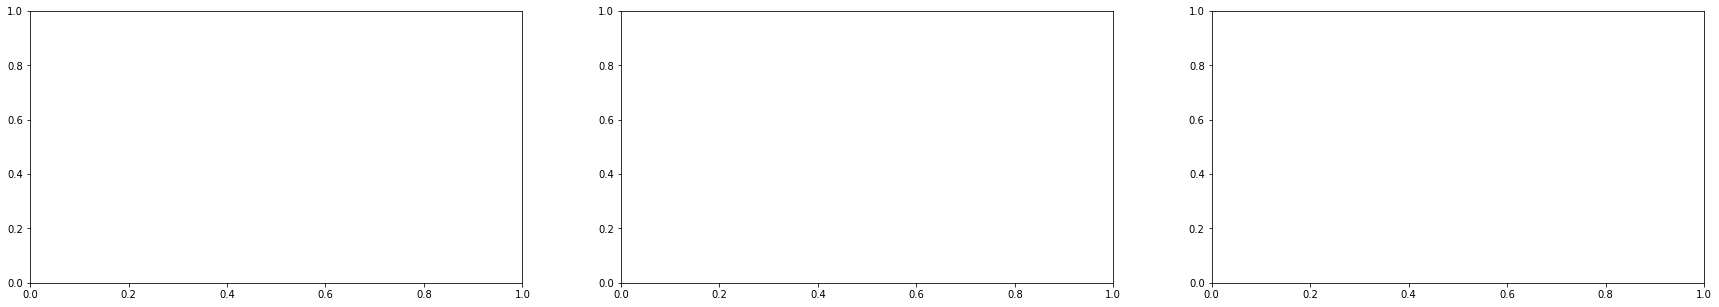

In [25]:
angles(60)

/shared/centos7/anaconda3/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10
/shared/centos7/anaconda3/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10


239


Text(0.5, 1.0, 'Up Uncleaved Tilt vs Torsion for Up RBD along resid 434-355')

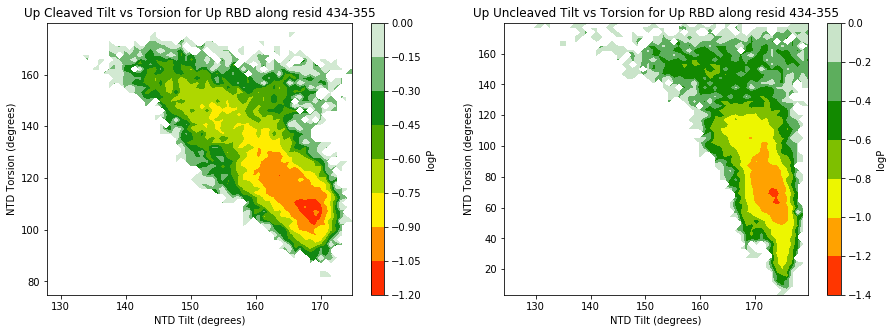

In [13]:
os.chdir('/work/SimBioSys/natesan/backup/Final/up/cleaved/')
x,y = np.loadtxt('newNTD_v_dc.dat',comments='#',unpack=True,dtype=float)
x1,y = np.loadtxt('newNTD_v_d_dc.dat',comments='#',unpack=True,dtype=float)
z1,y1 = np.loadtxt('../uncleaved/newNTD_v_du.dat',unpack=True,dtype=float)
z2,y1 = np.loadtxt('../uncleaved/newNTD_v_d_du.dat',unpack=True,dtype=float)
data1 = pd.DataFrame({'frame':y,
                     'angle':x,
                     'dihed':x1})
data2 = pd.DataFrame({'frame':y1,
                     'angle':z1,
                     'dihed':z2})

xnew = x[:5000]
x1new = x1[:5000]
xmin = min(x)
x1min = min(x1)
xmax = max(x)
x1max = max(x1)  

z1new = z1[:5000]
z2new = z2[:5000]
z1min = min(z1)
z2min = min(z2)
z1max = max(z1)
z2max = max(z2)  


#rint(xmin,x1min,xmax,x1max)
#bins_angle1 = np.arange(xmin,xmax+1)
#bins_dihed1 = np.arange(x1min,x1max+1)

#bins_angle1 = np.arange(xmin,xmax+1)
#bins_dihed1 = np.arange(x1min,x1max+1)


H1,xedges,yedges = np.histogram2d(x,x1,bins=60,range=[[xmin,xmax],[x1min,x1max]])
H2,x1edges,y1edges = np.histogram2d(z1,z2,bins=60,range=[[z1min,z1max],[z2min,z2max]])

H_prob1 = -0.002*300*np.log10(H1) 
H_prob2 = -0.002*300*np.log10(H2) 


##for down cleaved,uncleaved Vertical

#print(data1.index[(data1['angle']>167)&(data1['angle']<170)&(data1['dihed']>96)&(data1['dihed']<105)].tolist())
#print(data2.index[(data2['angle']>173)&(data2['angle']<176)&(data2['dihed']>55)&(data2['dihed']<65)].tolist())

#frames1 = data1.loc[(data1['angle'] > 163) & (data1['angle'] < 170) & (data1['dihed'] > 95) & (data1['dihed'] < 110), 'frame'].tolist()

frames2 = data2.loc[(data2['angle'] > 170) & (data2['angle'] < 177) & (data2['dihed'] > 40) & (data2['dihed'] < 100), 'frame'].tolist()
#print(len(frames1))
print(len(frames2))
frame_indices2 = [int(frame) for frame in frames2]


##for up cleaved,uncleaved Horizontal protC

#print(data1.index[(data1['angle']>80)&(data1['angle']<86)&(data['dihed']>141)&(data['dihed']<145)].tolist())
#print(data.index[(data['angle']>100)&(data['angle']<105)&(data['dihed']>143)&(data['dihed']<148)].tolist())

#frames1 = data1.loc[(data1['angle'] > 82) & (data1['angle'] < 86) & (data1['dihed'] > 141) & (data1['dihed'] < 145), 'frame'].tolist()
#frames2 = data2.loc[(data2['angle'] > 100) & (data2['angle'] < 105) & (data2['dihed'] > 143) & (data2['dihed'] < 148), 'frame'].tolist()
#print(len(frames1))
#print(len(frames2))
#frame_indices1 = [int(frame) for frame in frames1]


##for up cleaved,uncleaved RBD horizontal, frames 3 and 4 is the vector pointing towards the opposite side

#print(data1.index[(data1['angle']>80)&(data1['angle']<86)&(data['dihed']>141)&(data['dihed']<145)].tolist())
#print(data.index[(data['angle']>100)&(data['angle']<105)&(data['dihed']>143)&(data['dihed']<148)].tolist())

#frames1 = data1.loc[(data1['angle'] > 32) & (data1['angle'] < 38) & (data1['dihed'] > 71) & (data1['dihed'] < 76), 'frame'].tolist()
#frames2 = data2.loc[(data2['angle'] > 40) & (data2['angle'] < 48) & (data2['dihed'] > 50) & (data2['dihed'] < 60), 'frame'].tolist()

#frames3 = data1.loc[(data1['angle'] > 140) & (data1['angle'] < 147) & (data1['dihed'] > 95) & (data1['dihed'] < 100), 'frame'].tolist()
#frames4 = data2.loc[(data2['angle'] > 135) & (data2['angle'] < 142) & (data2['dihed'] > 115) & (data2['dihed'] < 125), 'frame'].tolist()
#print(len(frames4))
#print(len(frames2))
#frame_indices4 = [int(frame) for frame in frames4]


##for down uncleaved, newangle vs newdihed
'''
#print(data.index[(data['angle']>130)&(data['angle']<138)&(data['dihed']>35)&(data['dihed']<43)].tolist())
print(data.index[(data['angle']>152)&(data['angle']<158)&(data['dihed']>58)&(data['dihed']<65)].tolist())
#frames1 = data.loc[(data['angle'] > 130) & (data['angle'] < 138) & (data['dihed'] > 35) & (data['dihed'] < 43), 'frame'].tolist()
frames2 = data.loc[(data['angle'] > 150) & (data['angle'] < 158) & (data['dihed'] > 58) & (data['dihed'] < 65), 'frame'].tolist()
frame_indices = [int(frame) for frame in frames2]
print(frame_indices)
'''


traj = md.load('/work/SimBioSys/share/delta/down/A.cc.skip-10.xtc',top='/work/SimBioSys/share/delta/down/A_cc.0015_renum.pdb')
traj1 = traj[frame_indices2]
traj1.save('NTD_vert_uncleav.xtc')

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))

colors= (['red', 'yellow', 'green', 'white'])
custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom', colors)  
img1 = ax1.contourf(xedges[1:],yedges[1:],H_prob1,cmap=custom_cmap,extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]])
img2 = ax2.contourf(x1edges[1:],y1edges[1:],H_prob2,cmap=custom_cmap,extent = [x1edges[0], x1edges[-1], y1edges[0], y1edges[-1]])


plt.colorbar(img1,ax=ax1,label = 'logP')
plt.colorbar(img2,ax=ax2,label = 'logP')

#ax1.set_xlim(left=100,right=160)
#ax1.set_ylim(top=150,bottom =50)

#ax2.set_xlim(left=100,right=160)
#ax2.set_ylim(top=150,bottom=50)

ax1.set_xlabel('NTD Tilt (degrees)')
ax1.set_ylabel('NTD Torsion (degrees)')

ax2.set_xlabel('NTD Tilt (degrees)')
ax2.set_ylabel('NTD Torsion (degrees)')


ax1.set_title('Up Cleaved Tilt vs Torsion for Up RBD along resid 434-355')
ax2.set_title('Up Uncleaved Tilt vs Torsion for Up RBD along resid 434-355')
#plt.savefig('newRBD_h_u.png',dpi=300,bbox_inches='tight')

## [44.59376345 45.59376345 46.59376345 47.59376345 48.59376345 49.59376345
 50.59376345 51.59376345 52.59376345 53.59376345 54.59376345 55.59376345
 56.59376345 57.59376345 58.59376345 59.59376345 60.59376345 61.59376345
 62.59376345 63.59376345 64.59376345 65.59376345 66.59376345 67.59376345
 68.59376345 69.59376345 70.59376345 71.59376345 72.59376345 73.59376345
 74.59376345 75.59376345 76.59376345 77.59376345 78.59376345 79.59376345
 80.59376345 81.59376345 82.59376345 83.59376345 84.59376345 85.59376345
 86.59376345]

[44.59376345 45.28827854 45.98279364 46.67730874 47.37182384 48.06633893
 48.76085403 49.45536913 50.14988422 50.84439932 51.53891442 52.23342951
 52.92794461 53.62245971 54.31697481 55.0114899  55.706005   56.4005201
 57.09503519 57.78955029 58.48406539 59.17858048 59.87309558 60.56761068
 61.26212578 61.95664087 62.65115597 63.34567107 64.04018616 64.73470126
 65.42921636 66.12373145 66.81824655 67.51276165 68.20727675 68.90179184
 69.59630694 70.29082204 70.98533713 71.67985223 72.37436733 73.06888242
 73.76339752 74.45791262 75.15242772 75.84694281 76.54145791 77.23597301
 77.9304881  78.6250032  79.3195183  80.01403339 80.70854849 81.40306359
 82.09757869 82.79209378 83.48660888 84.18112398 84.87563907 85.57015417
 86.26466927]




In [ ]:
def angles(bins): 
    fig, ax = plt.subplots(1, 3, figsize=(30, 5))
    #fig1, ax1 = plt.subplots(1, 3, figsize=(30, 5))
    for i in range(1,4):
        os.chdir('/work/SimBioSys/natesan/backup/Final/down/cleaved/')
        x,y = np.loadtxt('NTD_'+str(i)+'.dat',comments='#',unpack=True,dtype=float)
        x1,y = np.loadtxt('NTDdihed_'+str(i)+'.dat',comments='#',unpack=True,dtype=float)
        x2,y1 = np.loadtxt('../uncleaved/NTD_'+str(i)+'.dat',comments='#',unpack=True,dtype=float)
        x3,y = np.loadtxt('../uncleaved/NTDdihed_'+str(i)+'.dat',comments='#',unpack=True,dtype=float)
        xmin = min(x)
        x1min = min(x1)
        xmax = max(x)
        x1max = max(x1)  
      
        x2min = min(x2)
        x3min = min(x3)
        x2max = max(x2)
        x3max = max(x3)  
        #print(xmin,x1min,xmax,x1max)
        bins_angle = np.arange(xmin,xmax+1)
        bins_dihed = np.arange(x1min,x1max+1)
      
        bins_angle_1 = np.arange(x2min,x2max+1)
        bins_dihed_1 = np.arange(x3min,x3max+1)
        
        
        H,xedges,yedges = np.histogram2d(x[:5000],x1[:5000],bins=60,range=[[xmin,xmax],[x1min,x1max]])
        H_prob = -0.002*300*np.log10(H)  
        
             
        H_1,xedges_1,yedges_1 = np.histogram2d(x2,x3,bins=(bins_angle_1,bins_dihed_1),range=[[x2min,x2max],[x3min,x3max]])
        H_prob_1 = -0.002*300*np.log10(H_1) 
        
        
        colors= (['red', 'yellow', 'green', 'white'])
        custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom', colors)  
        img = ax[i-1].contourf(xedges[1:],yedges[1:],H_prob,cmap=custom_cmap,extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]])
        #img_1 = ax1[i-1].contourf(xedges_1[1:],yedges_1[1:],H_prob_1.T,cmap=custom_cmap,extent = [xedges_1[0], xedges_1[-1], yedges_1[0], yedges_1[-1]])
        
        fig.colorbar(img, ax=ax[i-1],label = 'logP')
        #fig1.colorbar(img_1, ax=ax1[i-1],label = 'logP')
        
        ax[i-2].set_xlim(left=50,right=120)
        ax[i-2].set_ylim(top=180,bottom = 140)
        ax[i-1].set_xlabel('Tilt (degrees)')
        ax[i-1].set_ylabel('Torsion (degrees)')
        ax[i-1].set_title('Protomer'+' '+ str(chr(ord('@')+i))+' '+ 'Down Cleaved')
        #plt.savefig('NTDdown_cleav.png',dpi=300,bbox_inches='tight')
        
        
        #ax1[i-2].set_xlim(left=50,right=120)
        #ax1[i-2].set_ylim(top=180,bottom = 140)
        #ax1[i-1].set_xlabel('Tilt (degrees)')
        #ax1[i-1].set_ylabel('Torsion (degrees)')
        #ax1[i-1].set_title('Protomer'+' '+ str(chr(ord('@')+i))+' '+ 'Down Uncleaved')
        #plt.savefig('NTDdown_uncleav.png',dpi=300,bbox_inches='tight')

In [ ]:
angles(60)

In [23]:
def angles(bins): 
        os.chdir('/work/SimBioSys/natesan/backup/Final/up/uncleaved/')
        x,y = np.loadtxt('RBD_vertical_upuncleav2.dat',comments='#',unpack=True,dtype=float)
        x1,y = np.loadtxt('RBD_vertical_dihed_upuncleav2.dat',comments='#',unpack=True,dtype=float)
        data = pd.DataFrame({'frame':y,
                     'angle':x,
                     'dihed':x1})
        xmin = min(x)
        x1min = min(x1)
        xmax = max(x)
        x1max = max(x1)  
        bins_angle = np.arange(xmin,xmax+1)
        bins_dihed = np.arange(x1min,x1max+1)
        H,xedges,yedges = np.histogram2d(x[:5000],x1[:5000],bins=(bins_angle,bins_dihed),range=[[xmin,xmax],[x1min,x1max]])
        H_prob = -0.002*300*np.log10(H)  
        colors= (['red', 'yellow', 'green', 'white'])

    ## for up cleaved, angle vs dihed, protomer B
        '''
        print(data.index[(data['angle']>112)&(data['angle']<118)&(data['dihed']>30)&(data['dihed']<35)].tolist())
        frames1 = data.loc[(data['angle'] > 112) & (data['angle'] < 118) & (data['dihed'] > 30) & (data['dihed'] < 35), 'frame'].tolist()
        print(frames1)
        frame_indices = [int(frame) for frame in frames1]
        '''
    ## for up uncleaved, angle vs dihed, protomer B  
        '''
        print(data.index[(data['angle']>120)&(data['angle']<125)&(data['dihed']>35)&(data['dihed']<39)].tolist())
        frames1 = data.loc[(data['angle'] > 120) & (data['angle'] < 125) & (data['dihed'] > 35) & (data['dihed'] < 39), 'frame'].tolist()
        frame_indices = [int(frame) for frame in frames1]
        '''    
        
    ## for up cleaved, angle vs dihed, protomer C
        '''
        print(data.index[(data['angle']>95)&(data['angle']<100)&(data['dihed']>11)&(data['dihed']<15)].tolist())
        frames1 = data.loc[(data['angle'] > 95) & (data['angle'] < 100) & (data['dihed'] > 11) & (data['dihed'] < 15), 'frame'].tolist()
        print(len(frames1))
        frame_indices = [int(frame) for frame in frames1]
        '''   
         
    ## for up uncleaved, angle vs dihed, protomer C
        
        print(data.index[(data['angle']>90)&(data['angle']<100)&(data['dihed']>6)&(data['dihed']<10)].tolist())
        frames1 = data.loc[(data['angle'] > 90) & (data['angle'] < 100) & (data['dihed'] > 6) & (data['dihed'] < 10), 'frame'].tolist()
        print(len(frames1))
        frame_indices = [int(frame) for frame in frames1]
              
    
        
    ## for up cleaved, RBD angle vs RBD dihed, protomer B
        '''
        #print(data.index[(data['angle']>48)&(data['angle']<55)&(data['dihed']>124)&(data['dihed']<137)].tolist())
        #frames1 = data.loc[(data['angle'] > 48) & (data['angle'] < 55) & (data['dihed'] > 124) & (data['dihed'] < 137), 'frame'].tolist()

        print(data.index[(data['angle']>65)&(data['angle']<70)&(data['dihed']>125)&(data['dihed']<135)].tolist())
        frames2 = data.loc[(data['angle'] > 65) & (data['angle'] < 70) & (data['dihed'] > 125) & (data['dihed'] < 135), 'frame'].tolist()
    
        print(len(frames2))
        frame_indices = [int(frame) for frame in frames2]
        '''
        ## for up uncleaved, RBD angle vs RBD dihed, protomer B  
        '''
        print(data.index[(data['angle']>45)&(data['angle']<52)&(data['dihed']>125)&(data['dihed']<140)].tolist())
        frames1 = data.loc[(data['angle'] > 45) & (data['angle'] < 52) & (data['dihed'] > 125) & (data['dihed'] < 140), 'frame'].tolist()
        
        print(data.index[(data['angle']>53)&(data['angle']<57)&(data['dihed']>127)&(data['dihed']<135)].tolist())
        frames2 = data.loc[(data['angle'] > 53) & (data['angle'] < 57) & (data['dihed'] > 127) & (data['dihed'] < 135), 'frame'].tolist()
        frame_indices = [int(frame) for frame in frames2]
        '''
    
        #traj = md.load('/work/SimBioSys/share/delta/up/B.cc.skip-10.xtc',top = '/work/SimBioSys/share/delta/up/B_cc.0015_renum.pdb')
        #traj1 = traj[frame_indices]
        #traj1.save('basin1_protC.xtc')
    
    
    
        custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom', colors)  
        img = plt.contourf(xedges[1:],yedges[1:],H_prob.T,cmap=custom_cmap,extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]])
        plt.colorbar(img,label = 'logP')
        #plt.xlim(left=70,right=120)
        #plt.ylim(top=30,bottom = 0)
        #ax[i-1].set_xlabel('RBD Opening (degrees)')
        #ax[i-1].set_ylabel('RBD Tilt (degrees)')
        #ax[i-1].set_title('Protomer'+' '+ str(chr(ord('@')+i))+' '+ 'Up Cleaved')
        #plt.savefig('RBDupcleaved.png',dpi=300,bbox_inches='tight')

In [ ]:
angles(60)

In [ ]:
opening()

In [ ]:
os.chdir('/work/SimBioSys/natesan/backup/Final/up/cleaved/')

In [ ]:
x,y = np.loadtxt('NTD_v_uu3.dat',unpack=True)
x1,y = np.loadtxt('NTD_v_d_uu3.dat',unpack=True)

In [ ]:
plt.scatter(x,x1)

/shared/centos7/anaconda3/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10
/shared/centos7/anaconda3/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 1.0, 'Down Uncleaved Tilt for RBD')

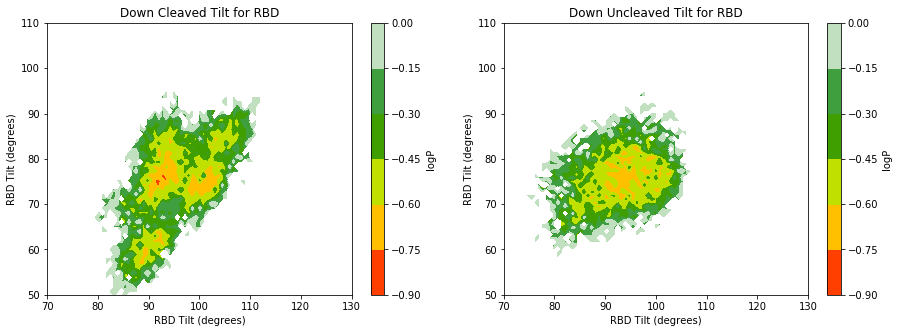

In [4]:
os.chdir('/work/SimBioSys/natesan/backup/Final/angles/Updated/')
x,y = np.loadtxt('down3_RBD_vert.dat',comments='#',unpack=True,dtype=float)
x1,y = np.loadtxt('down3_RBD_hor.dat',comments='#',unpack=True,dtype=float)
z1,y1 = np.loadtxt('down3uncleav_RBD_vert.dat',unpack=True,dtype=float)
z2,y1 = np.loadtxt('down3_uncleav_RBD_hor.dat',unpack=True,dtype=float)
data1 = pd.DataFrame({'frame':y,
                     'angle':x,
                     'dihed':x1})
data2 = pd.DataFrame({'frame':y1,
                     'angle':z1,
                     'dihed':z2})




xnew = x
x1new = x1
xmin = min(xnew)
x1min = min(x1new)
xmax = max(xnew)
x1max = max(x1new)  

z1new = z1
z2new = z2
z1min = min(z1new)
z2min = min(z2new)
z1max = max(z1new)
z2max = max(z2new)

bins_angle_1 = np.linspace(xmin,xmax,50)
bins_dihed_1 = np.linspace(x1min,x1max,50)

bins_angle_2 = np.linspace(z1min,z1max,50)
bins_dihed_2 = np.linspace(z2min,z2max,50)

H1,xedges,yedges = np.histogram2d(xnew,x1new,bins=(bins_angle_1,bins_dihed_1),range=[[xmin,xmax],[x1min,x1max]])
H2,x1edges,y1edges = np.histogram2d(z1new,z2new,bins=(bins_angle_2,bins_dihed_2),range=[[z1min,z1max],[z2min,z2max]])



H_prob1 = -0.002*300*np.log10(H1) 
H_prob2 = -0.002*300*np.log10(H2) 


#for up, RBD new vertical
#frames1 = data1.loc[(data1['angle'] > 160) & (data1['angle'] < 162) & (data1['dihed'] > -37) & (data1['dihed'] < -36), 'frame'].tolist()
#This below is for the lower tilt basin
#frames1 = data1.loc[(data1['angle'] > 137) & (data1['angle'] < 139) & (data1['dihed'] > -95) & (data1['dihed'] < -94), 'frame'].tolist()
#frames2 = data2.loc[(data2['angle'] > 137) & (data2['angle'] < 139) & (data2['dihed'] > -82) & (data2['dihed'] < -81), 'frame'].tolist()
#frame_indices = [int(frame) for frame in frames1]
##For Glycans
#frames1 = data1.loc[(data1['angle'] > 160) & (data1['angle'] < 163) & (data1['dihed'] > -36) & (data1['dihed'] < -29), 'frame'].tolist()
#frames1 = data1.loc[(data1['angle'] > 137) & (data1['angle'] < 142) & (data1['dihed'] > -95) & (data1['dihed'] < -90), 'frame'].tolist()
#frames2 = data2.loc[(data2['angle'] > 137) & (data2['angle'] < 140) & (data2['dihed'] > -85) & (data2['dihed'] < -80), 'frame'].tolist()
#frame_indices = [int(frame) for frame in frames1]
#print(len(frames1))


#for up, RBD new perp
#frames1 = data1.loc[(data1['angle'] > 75) & (data1['angle'] < 77) & (data1['dihed'] > -148) & (data1['dihed'] < -147), 'frame'].tolist()
#frames2 = data2.loc[(data2['angle'] > 73) & (data2['angle'] < 75) & (data2['dihed'] > -142) & (data2['dihed'] < -141), 'frame'].tolist()
#frame_indices = [int(frame) for frame in frames2]
#print(len(frames2))


#for up, RBD new hor
#frames1 = data1.loc[(data1['angle'] > 86) & (data1['angle'] < 87) & (data1['dihed'] > -72) & (data1['dihed'] < -71), 'frame'].tolist()
#frames2 = data2.loc[(data2['angle'] > 101) & (data2['angle'] < 104) & (data2['dihed'] > -62) & (data2['dihed'] < -60), 'frame'].tolist()
#frames3 is the lower tilt basin for the uncleaved system
#frames3 = data2.loc[(data2['angle'] > 80) & (data2['angle'] < 82) & (data2['dihed'] > -83) & (data2['dihed'] < -81), 'frame'].tolist()
#frame_indices = [int(frame) for frame in frames3]
#print(len(frames3))
##For Glycans
#frames1 = data1.loc[(data1['angle'] > 86) & (data1['angle'] < 88) & (data1['dihed'] > -74) & (data1['dihed'] < -70), 'frame'].tolist()
#frames3 = data2.loc[(data2['angle'] > 79) & (data2['angle'] < 83) & (data2['dihed'] > -85) & (data2['dihed'] < -80), 'frame'].tolist()
#frame_indices = [int(frame) for frame in frames1]
#print(len(frames3))


#for up, NTD new hor
#frames1 = data1.loc[(data1['angle'] > 81) & (data1['angle'] < 82) & (data1['dihed'] > -10) & (data1['dihed'] < -9), 'frame'].tolist()
#frames2 = data2.loc[(data2['angle'] > 100) & (data2['angle'] < 102) & (data2['dihed'] > -17) & (data2['dihed'] < -16), 'frame'].tolist()
#frame_indices = [int(frame) for frame in frames2]
#print(len(frames2))

#for up, NTD new perp
#frames1 = data1.loc[(data1['angle'] > 82) & (data1['angle'] < 83) & (data1['dihed'] > -68) & (data1['dihed'] < -67), 'frame'].tolist()
#frames2 = data2.loc[(data2['angle'] > 92) & (data2['angle'] < 94) & (data2['dihed'] > -65) & (data2['dihed'] < -63), 'frame'].tolist()
#frame_indices = [int(frame) for frame in frames2]
#print(len(frames2))


#for down,NTD vert
#frames1 = data1.loc[(data1['angle'] > 145) & (data1['angle'] < 146) & (data1['dihed'] > -50) & (data1['dihed'] < -49), 'frame'].tolist()
#frames2 = data2.loc[(data2['angle'] > 152) & (data2['angle'] < 153) & (data2['dihed'] > -38) & (data2['dihed'] < -37), 'frame'].tolist()
#frame_indices = [int(frame) for frame in frames2]
#print(len(frames2))


#traj = md.load('/work/SimBioSys/share/delta/down/A.cc.skip-10.xtc',top = '/work/SimBioSys/share/delta/down/A_cc.0015_renum.pdb')
#traj = md.load('../../../up/cleaved/upcleav.xtc',top='../../../up/cleaved/upcleaved.pdb')
#traj1 = traj[frame_indices]
#traj1.save('../../../up/cleaved/glycans/RBDcleav_vert_basin2.xtc')

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))

colors= (['red', 'yellow', 'green', 'white'])
custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom', colors)  




img1 = ax1.contourf(xedges[1:],yedges[1:],H_prob1.T,cmap=custom_cmap,extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]])
img2 = ax2.contourf(x1edges[1:],y1edges[1:],H_prob2.T,cmap=custom_cmap,extent = [x1edges[0], x1edges[-1], y1edges[0], y1edges[-1]])

#plt.scatter(xnew,x1new,c='r')
#plt.scatter(z1new,z2new,c='b')

plt.colorbar(img1,ax=ax1,label = 'logP')
plt.colorbar(img2,ax=ax2,label = 'logP')

ax1.set_xlim(left=70,right=130)
ax1.set_ylim(top=110,bottom =50)

ax2.set_xlim(left=70,right=130)
ax2.set_ylim(top=110,bottom=50)


ax1.set_xlabel('RBD Tilt (degrees)')
ax1.set_ylabel('RBD Tilt (degrees)')

ax2.set_xlabel('RBD Tilt (degrees)')
ax2.set_ylabel('RBD Tilt (degrees)')


ax1.set_title('Down Cleaved Tilt for RBD')
ax2.set_title('Down Uncleaved Tilt for RBD')
#plt.savefig('RBD_down.png',dpi=300,bbox_inches='tight')

In [25]:
os.chdir('/work/SimBioSys/natesan/backup/Final/up/uncleaved/')

In [26]:
traj = md.load('upuncleavRBD_hor.xtc',top='upuncleavRBD_hor.pdb')

In [27]:
traj

<mdtraj.Trajectory with 224 frames, 63343 atoms, 3864 residues, and unitcells at 0x2afa55ffb2d0>